In [1]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification,make_moons
from matplotlib import pyplot as plt
import time
import sys,os
np.random.seed(42)

In [2]:
def dataset(n,epsilon):
    centers = [-np.ones(2), np.ones(2)]

    X, y = make_blobs(n_samples=n, n_features=2, cluster_std=1.4,
                  centers=centers, shuffle=True)

    Xtest, ytest = make_blobs(n_samples=1000, n_features=2, cluster_std=1.4,
                  centers=centers, shuffle=True)
    
    for f in range(int(n*epsilon)):
        ind=int(np.floor(np.random.rand()*len(X)))
        X=np.vstack([X[:ind],(0.1*(np.random.randn(2))+np.array([24,8])).reshape(1,2),X[ind:]])
        y=np.hstack([y[:ind],[0],y[ind:]])
    return X,y,Xtest,ytest


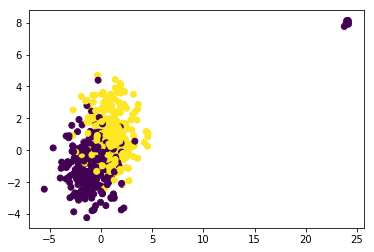

In [3]:
X,y,Xtest,ytest=dataset(500,0.02)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
def plot_classif(clfs,limPlot,title,shape):
    for i in range(len(clfs)):
        clf=clfs[i]
        plt.subplot(shape[0],shape[1],i+1)
        clf.fit(X,y)
        pred=clf.predict(Xtest)
        xx, yy = np.meshgrid(np.arange(limPlot[0][0], limPlot[0][1], 0.1), np.arange(limPlot[1][0], limPlot[1][1], 0.1))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
        plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
        plt.title(title[i]+': '+str(np.mean(ytest==pred)))

In [5]:
from mest import logreg_mest
from grad_hub import grad_hub
from linear_model_MOM import logregMOM

/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
lrMOM=logregMOM(None,40,20,0.1,300,agg=1)
hubergrad=grad_hub(epochs=300)
redescending=logreg_mest(epochs=300)

/usr/lib/python3.6/site-packages/statsmodels/robust/scale.py:227: RuntimeWarning: divide by zero encountered in true_divide
  subset = lambda x: np.less(np.fabs(resid/x),self.d)
/usr/lib/python3.6/site-packages/statsmodels/robust/scale.py:228: RuntimeWarning: divide by zero encountered in true_divide
  chi = lambda s: subset(s)*(resid/s)**2/2+(1-subset(s))*(self.d**2/2)
/usr/lib/python3.6/site-packages/statsmodels/robust/scale.py:228: RuntimeWarning: invalid value encountered in multiply
  chi = lambda s: subset(s)*(resid/s)**2/2+(1-subset(s))*(self.d**2/2)
/usr/lib/python3.6/site-packages/statsmodels/robust/norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
/usr/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/lib/python3.6/site-packages/statsmodels/robust/norms.py:267: RuntimeWarning: invalid value encountered in less_equal
  retur

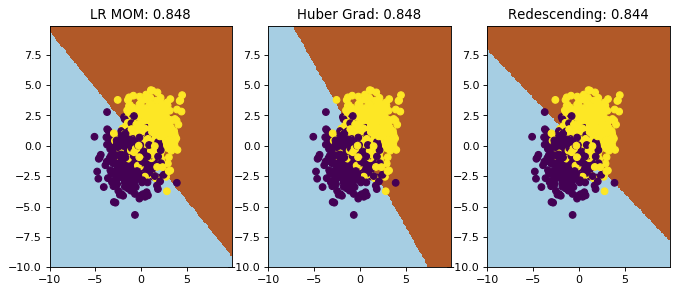

In [7]:
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plot_classif([lrMOM,hubergrad,redescending],[[-10,10],[-10,10]],['LR MOM','Huber Grad','Redescending'],[1,3])
plt.show()

In [8]:
from mest_th import logreg_mest
from grad_hub_th import grad_hub
from linear_model_MOM_th import logregMOM_binary_threshold

X,y,Xtest,ytest=dataset(20000,0.02)

#Stopping criterion : std of the 5 last error is smaller than 1e-2
lrMOM=logregMOM_binary_threshold(None,int(20000*0.02*2.1),20,0.1,agg=1)
hubergrad=grad_hub()
redescending=logreg_mest()

print('LR MOM')
a1=time.time()
lrMOM.fit(X,y)
print('Precision : ',np.mean(lrMOM.predict(Xtest)==ytest))
a2=time.time()
print('Time ',a2-a1)

print('Hubergrad')
a1=time.time()
hubergrad.fit(X,y)
print('Precision : ',np.mean(hubergrad.predict(Xtest)==ytest))
a2=time.time()
print('Time ',a2-a1)

print('redescending')
a1=time.time()
redescending.fit(X,y)
print('Precision : ',np.mean(redescending.predict(Xtest)==ytest))
a2=time.time()
print('Time ',a2-a1)

LR MOM
Training finished in  13  iterations
Precision :  0.827
Time  0.36614084243774414
Hubergrad


/usr/lib/python3.6/site-packages/statsmodels/robust/scale.py:227: RuntimeWarning: divide by zero encountered in true_divide
  subset = lambda x: np.less(np.fabs(resid/x),self.d)
/usr/lib/python3.6/site-packages/statsmodels/robust/scale.py:228: RuntimeWarning: divide by zero encountered in true_divide
  chi = lambda s: subset(s)*(resid/s)**2/2+(1-subset(s))*(self.d**2/2)
/usr/lib/python3.6/site-packages/statsmodels/robust/scale.py:228: RuntimeWarning: invalid value encountered in multiply
  chi = lambda s: subset(s)*(resid/s)**2/2+(1-subset(s))*(self.d**2/2)
/usr/lib/python3.6/site-packages/statsmodels/robust/norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
/usr/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/lib/python3.6/site-packages/statsmodels/robust/norms.py:267: RuntimeWarning: invalid value encountered in less_equal
  retur

Training finished in  5  iterations
Precision :  0.831
Time  2.070007801055908
redescending
Training finished in  6  iterations
Precision :  0.837
Time  17.384571075439453
